In [4]:
import masknmf
from mbo_utilities import imread, imwrite, get_files
import tifffile

import fastplotlib as fpl

In [ ]:
data = imread("D://demo//raw")
data.fix_phase = True
data.use_fft = True
out_tif_path = "D://demo//tiffs"

imwrite(data, out_tif_path, planes=[6, 7, 8], roi=None, overwrite=True)

tiff_files = get_files("D://demo//tiffs", str_contains="tif")

data = tifffile.imread(tiff_files[0])

block_sizes = [32, 32]
max_components = 20
device = "cuda"
num_frames_for_spatial_fit = data.shape[
    0
]  # How many frames we use to estimate the spatial basis in PMD

In [ ]:
pmd_result = masknmf.compression.pmd_decomposition(
    data,
    block_sizes,
    num_frames_for_spatial_fit,
    max_components=max_components,
    device=device,
    frame_batch_size=1024,
)

pmd_result.to("cuda")

Saving plane06_stitched.tiff:   0%|          | 0/37 [00:00<?, ?it/s]

Saving plane07_stitched.tiff:   0%|          | 0/37 [00:00<?, ?it/s]

Saving plane08_stitched.tiff:   0%|          | 0/37 [00:00<?, ?it/s]

[25-10-26 18:52:11]: Starting compression
[25-10-26 18:52:11]: sampled from the following regions: [0]
[25-10-26 18:52:11]: We are initializing on a total of 1574 frames
[25-10-26 18:52:11]: Loading data to estimate complete spatial basis
[25-10-26 18:52:11]: skipping the pruning step for frame cutoff
[25-10-26 18:52:11]: Finding spatiotemporal roughness thresholds


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:01<00:00, 158.69it/s]

[25-10-26 18:52:13]: Running Blockwise Decompositions


[25-10-26 18:52:24]: Constructed U matrix. Rank of U is 5766
[25-10-26 18:52:26]: PMD Objected constructed


RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
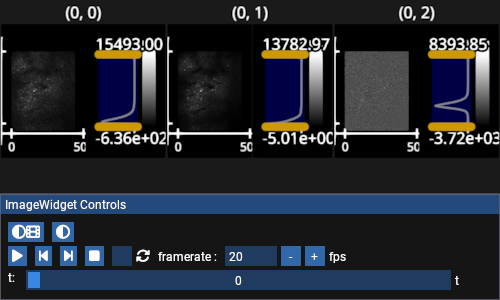

In [9]:
import fastplotlib as fpl

pmd_residual = masknmf.PMDResidualArray(data, pmd_result)
iw = fpl.ImageWidget(data=[data, pmd_result, pmd_residual], figure_shape=(1, 3))
iw.cmap = "gray"
iw.show()